<a href="https://colab.research.google.com/github/DuckYuh/CV1/blob/main/CV1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Phần 1: Biểu diễn ảnh màu và ảnh xám


In [14]:
import os
import requests

image_folder = "images"

if not os.path.exists(image_folder):
    os.makedirs(image_folder)
    print(f"Created folder: {image_folder}")

In [15]:
%pip install --quiet opencv-python-headless numpy

In [16]:
import cv2
import numpy as np
import os
from IPython.display import display, Image

In [17]:
def display_cv2_img(img, width=200):
    _, encoded = cv2.imencode('.jpg', img)
    display(Image(encoded.tobytes(), width=width))

loaded_images = []

## Load ảnh màu

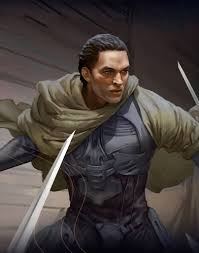

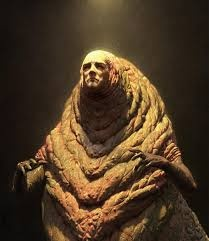

In [18]:
if os.path.exists(image_folder):
    files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    loaded_images = []
    for file in files:
        path = os.path.join(image_folder, file)
        img = cv2.imread(path)
        if img is not None:
            loaded_images.append({'name': file, 'data': img})
            display_cv2_img(img)

## Chuyển đổi ảnh màu sang ảnh xám
OpenCV sử dụng công thức có trọng số để chuyển đổi ảnh màu sang xám:

$$ \text{Gray} = 0.299 \times R + 0.587 \times G + 0.114 \times B $$

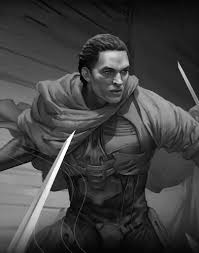

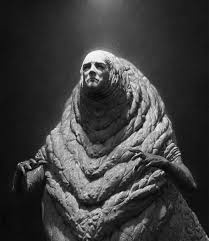

In [19]:
for item in loaded_images:
    img = item['data']

    # Màu sang xám
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    display_cv2_img(gray)

## Chuyển đổi ảnh xám sang ảnh màu
Khi chuyển ảnh xám về định dạng 3 kênh, mỗi kênh (R, G, B) sẽ có cùng giá trị, do đó ảnh vẫn hiển thị màu xám. Không thể khôi phục lại màu gốc vì thông tin màu đã bị mất trong quá trình chuyển đổi.

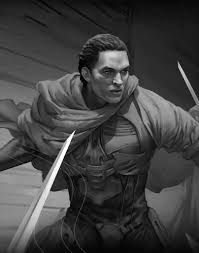

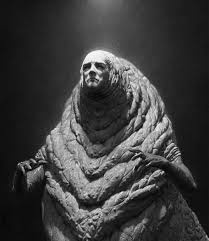

In [20]:
for item in loaded_images:
    img = item['data']

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_to_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    display_cv2_img(gray_to_bgr)

## Tách riêng từng kênh màu (R, G, B)


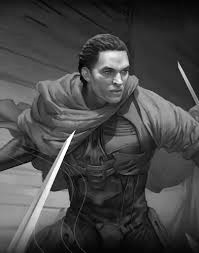

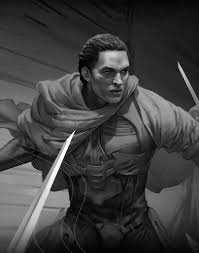

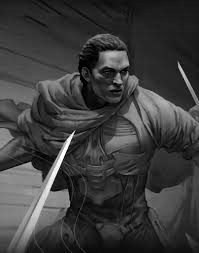

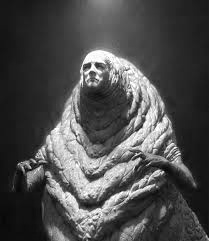

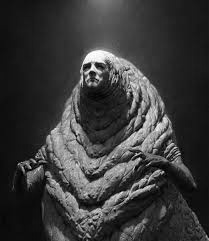

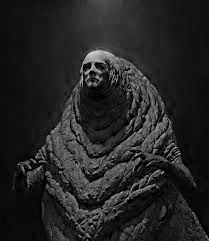

In [21]:
for item in loaded_images:
    img = item['data']
    b, g, r = cv2.split(img)

    display_cv2_img(r)
    display_cv2_img(g)
    display_cv2_img(b)

## Tái tạo ảnh màu ban đầu



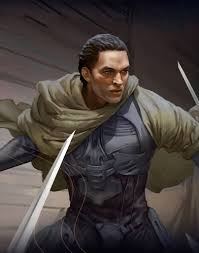

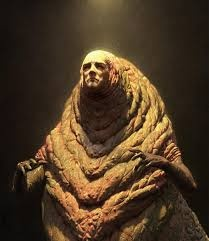

In [22]:
for item in loaded_images:
    img = item['data']
    b, g, r = cv2.split(img)

    reconstructed = cv2.merge([b, g, r])
    display_cv2_img(reconstructed)

##Hoán đổi kênh (BGR → RGB)

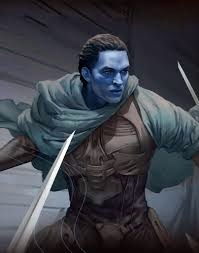

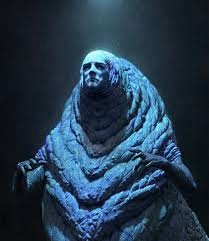

In [23]:
for item in loaded_images:
    img = item['data']
    b, g, r = cv2.split(img)

    swapped = cv2.merge([r, g, b])
    display_cv2_img(swapped)

##Loại bỏ kênh Green

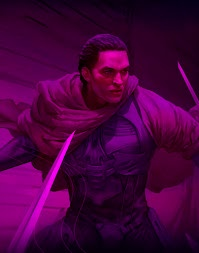

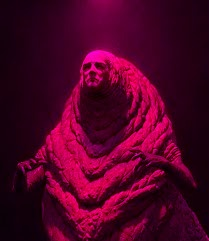

In [24]:
for item in loaded_images:
    img = item['data']
    b, g, r = cv2.split(img)

    zeros = np.zeros_like(g)
    no_green = cv2.merge([b, zeros, r])
    display_cv2_img(no_green)